# Data Wrangling 

### Introduction 
According to a survey, done by marketwatch.com, of more than 1,000 dog owners, most spent an average of \\$40 to \\$290 per month on their dogs — or an average of \\$480 to \\$3,470 annually. But this number will vary depending on a dog's individual needs, size, pet insurance plan's costs, and health status.
Pet insurance premiums can range between \\$360-\\$720 annually.  Sick and emergency veterinary visits can cost an owner between \\$150-\\$1,200 per visit. Looking deeper, according to Healthy Paws Insurance 2019 report, potential treatment costs for skin conditions can go up to \\$4,100. 

#### Information quoted from: 
- https://www.marketwatch.com/guides/insurance-services/cost-of-owning-a-dog
- https://www.thisoldhouse.com/home-finances/reviews/cost-of-owning-a-dog

### Recap of problem 
Do environmental factors/living conditions increase the likelihood of a dog developing skin conditions? Are certain breeds (because of their size and other characteristics) more prone to these conditions including canine atopic dermatitis? If so, can we determine if a specific breed or specific dog regardless of breed, given specific environmental exposure, will present skin issues? Can we identify and communicate the risks and preventative living conditions for owners to help their dogs and prevent emergency vet visits and treatment cost? 

## Import & Loading data 
Data files have been downloaded to local drive from: 
- Data_Environment and skin symptoms.xlsx (figshare.com)
- Dogs Intelligence and Size (kaggle.com)
- Best in Show (data about dogs)(kaggle.com)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
AKC_Breed_Info = pd.read_csv("../Raw data/AKC Breed Info.csv").drop("index", axis=1)

In [3]:
dog_intelligence = pd.read_csv("../Raw data/dog_intelligence.csv").drop("index", axis=1)

In [4]:
show = pd.read_csv("../Raw data/best_in_show.csv")

In [5]:
# Transform .xlsx file to csv to df
read_file = pd.read_excel("../Raw data/Data_Environmentandskinsymptoms.xlsx")

In [6]:
read_file.to_csv("Data_Environmentandskinsymptoms.csv", index = None, header = True)

In [7]:
Environment_Skin = pd.DataFrame(pd.read_csv("Data_Environmentandskinsymptoms.csv"))

In [8]:
AKC_Breed_Info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Breed               150 non-null    object
 1   height_low_inches   150 non-null    object
 2   height_high_inches  150 non-null    object
 3   weight_low_lbs      150 non-null    object
 4   weight_high_lbs     150 non-null    object
dtypes: object(5)
memory usage: 6.0+ KB


In [9]:
AKC_Breed_Info.head()

,Breed,height_low_inches,height_high_inches,weight_low_lbs,weight_high_lbs
0,Akita,26,28,80,120
1,Anatolian Sheepdog,27,29,100,150
2,Bernese Mountain Dog,23,27,85,110
3,Bloodhound,24,26,80,120
4,Borzoi,26,28,70,100


In [10]:
dog_intelligence.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136 entries, 0 to 135
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Breed           136 non-null    object
 1   Classification  136 non-null    object
 2   obey            125 non-null    object
 3   reps_lower      136 non-null    int64 
 4   reps_upper      136 non-null    int64 
dtypes: int64(2), object(3)
memory usage: 5.4+ KB


In [11]:
dog_intelligence.head()

,Breed,Classification,obey,reps_lower,reps_upper
0,Border Collie,Brightest Dogs,95%,1,4
1,Poodle,Brightest Dogs,95%,1,4
2,German Shepherd,Brightest Dogs,95%,1,4
3,Golden Retriever,Brightest Dogs,95%,1,4
4,Doberman Pinscher,Brightest Dogs,95%,1,4


In [12]:
# Merging CSVs 
df = dog_intelligence.set_index("Breed").join(AKC_Breed_Info.set_index("Breed"), how='inner')
df = df.join(show[["Dog breed", "category"]].set_index("Dog breed"), how='left')

In [13]:
df.head()

,Classification,obey,reps_lower,reps_upper,height_low_inches,height_high_inches,weight_low_lbs,weight_high_lbs,category
Breed,,,,,,,,,
Border Collie,Brightest Dogs,95%,1,4,19,21,40,40,herding
Golden Retriever,Brightest Dogs,95%,1,4,21,24,55,75,sporting
Doberman Pinscher,Brightest Dogs,95%,1,4,26,28,60,100,working
Labrador Retriever,Brightest Dogs,95%,1,4,21,24,55,80,sporting
Papillon,Brightest Dogs,95%,1,4,8,11,5,10,toy


In [14]:
df.T

Breed,Border Collie,Golden Retriever,Doberman Pinscher,Labrador Retriever,Papillon,Rottweiler,Australian Cattle Dog,English Springer Spaniel,Schipperke,Belgian Sheepdog,...,Bullmastiff,Shih Tzu,Basset Hound,Mastiff,Beagle,Bloodhound,Borzoi,Chow Chow,Basenji,Afghan Hound
Classification,Brightest Dogs,Brightest Dogs,Brightest Dogs,Brightest Dogs,Brightest Dogs,Brightest Dogs,Brightest Dogs,Excellent Working Dogs,Excellent Working Dogs,Excellent Working Dogs,...,Fair Working/Obedience Intelligence,Lowest Degree of Working/Obedience Intelligence,Lowest Degree of Working/Obedience Intelligence,Lowest Degree of Working/Obedience Intelligence,Lowest Degree of Working/Obedience Intelligence,Lowest Degree of Working/Obedience Intelligence,Lowest Degree of Working/Obedience Intelligence,Lowest Degree of Working/Obedience Intelligence,Lowest Degree of Working/Obedience Intelligence,Lowest Degree of Working/Obedience Intelligence
obey,95%,95%,95%,95%,95%,95%,95%,85%,85%,85%,...,30%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
reps_lower,1,1,1,1,1,1,1,5,5,5,...,41,81,81,81,81,81,81,81,81,81
reps_upper,4,4,4,4,4,4,4,15,15,15,...,80,100,100,100,100,100,100,100,100,100
height_low_inches,19,21,26,21,8,22,17,20,10,22,...,25,8,14,27,13,24,26,19,17,25
height_high_inches,21,24,28,24,11,27,20,20,13,26,...,27,11,14,30,16,26,28,22,17,27
weight_low_lbs,40,55,60,55,5,90,35,45,12,60,...,100,9,40,175,18,80,70,45,20,50
weight_high_lbs,40,75,100,80,10,110,45,55,18,75,...,130,16,50,190,30,120,100,55,22,60
category,herding,sporting,working,sporting,toy,working,herding,sporting,non-sporting,herding,...,working,toy,hound,working,hound,hound,hound,non-sporting,hound,hound


In [15]:
df.columns = map(str.capitalize, df.columns)

In [16]:
df[ 'Category'].value_counts()

sporting        20
working         18
hound           18
terrier         16
toy             12
non-sporting    12
herding          9
Name: Category, dtype: int64

In [17]:
df['Classification'].value_counts()

Average Working/Obedience Intelligence              34
Above Average Working Dogs                          24
Fair Working/Obedience Intelligence                 17
Excellent Working Dogs                              14
Lowest Degree of Working/Obedience Intelligence      9
Brightest Dogs                                       7
Name: Classification, dtype: int64

In [18]:
df.columns

Index(['Classification', 'Obey', 'Reps_lower', 'Reps_upper',
       'Height_low_inches', 'Height_high_inches', 'Weight_low_lbs',
       'Weight_high_lbs', 'Category'],
      dtype='object')

In [19]:
# Check on missing NaN values 
missing = pd.concat([df.isnull().sum(), 100 * df.isnull().mean()], axis= 1)
missing.columns=["Total missing values", "%" ]
missing.sort_values(by=['Total missing values', '%'], ascending=False)

,Total missing values,%
Obey,9,8.571429
Classification,0,0.000000
Reps_lower,0,0.000000
Reps_upper,0,0.000000
Height_low_inches,0,0.000000
Height_high_inches,0,0.000000
Weight_low_lbs,0,0.000000
Weight_high_lbs,0,0.000000
Category,0,0.000000


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 105 entries, Border Collie to Afghan Hound
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Classification      105 non-null    object
 1   Obey                96 non-null     object
 2   Reps_lower          105 non-null    int64 
 3   Reps_upper          105 non-null    int64 
 4   Height_low_inches   105 non-null    object
 5   Height_high_inches  105 non-null    object
 6   Weight_low_lbs      105 non-null    object
 7   Weight_high_lbs     105 non-null    object
 8   Category            105 non-null    object
dtypes: int64(2), object(7)
memory usage: 12.3+ KB


In [21]:
df.describe()

,Reps_lower,Reps_upper
count,105.000000,105.000000
mean,26.390476,42.457143
std,20.564858,28.111737
min,1.000000,4.000000
25%,16.000000,25.000000
50%,26.000000,40.000000
75%,26.000000,40.000000
max,81.000000,100.000000


In [22]:
Environment_Skin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8644 entries, 0 to 8643
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        8643 non-null   float64
 1   BREED                     8509 non-null   object 
 2   FCI                       8501 non-null   float64
 3   SKIN SYMPTOMS             8644 non-null   object 
 4   SEASON BORN               8373 non-null   object 
 5   HEATING SYSTEM_HOUSE      7809 non-null   object 
 6   HOUSE _NOW                8593 non-null   object 
 7   HOUSE_BEFORE              6372 non-null   object 
 8   CLEAN_HOUSE               8593 non-null   object 
 9   PUPPY_DEWORMED            8000 non-null   object 
 10  PUPPY_VACCINATED          8224 non-null   object 
 11  DAM_DEWORMED_PREBIRTH     4062 non-null   object 
 12  DAM_VACCINATED_PREBIRTH   2402 non-null   object 
 13  GENDER                    8415 non-null   object 
 14  OVER 50%

In [23]:
Environment_Skin.columns = map(str.capitalize, Environment_Skin.columns)

In [24]:
Environment_Skin.head()

,Id,Breed,Fci,Skin symptoms,Season born,Heating system_house,House _now,House_before,Clean_house,Puppy_dewormed,...,Other dogs,Born in owner family,Smoking_previously,Does the dog have a yard,Bcs_under 2 mo,Outside_under 2 mo,Outside a day_under 5mo,Skin symptoms_dam,Age,Vet diagnosis
0,NaN,(In Finnish),NaN,"1=No, 2=Yes","1=Winter, 2=Spring, 3=Summer, 4=Fall","1=Wood, 2=Other","1=Apartment, 2=Row, 3=Detached wood, 4=Detache...","1=Apartment, 2=Row, 3=Detached wood, 4=Detache...","1=Extremely clean, 2=Other","0=No, 1=Yes",...,"1=No, 2=Yes","1=No, 2=Yes","1=Mainly inside, 2=Rarely inside, 3=Only outside","1=No, 2=Loose in a yard, 3=Loose in a kennel, ...","1=Normal, 2=Obese, 3=Fat, 4=Slim, 5=Very slim","1=Several times a day, 2=Once a day, 3=Several...","1=Under 30 min, 2=30-60 min, 3=1-2 h, 4=Over 2h","1=No, 2=Yes",NaN,"0=No, 1=Yes"
1,3.0,bordercollie,1.0,1,1,1,NaN,NaN,2,1,...,1,1,NaN,2,NaN,5,NaN,1,7.0,0
2,4.0,monirotuinen,11.0,1,NaN,1,3,NaN,NaN,NaN,...,1,1,NaN,4,NaN,NaN,NaN,NaN,10.0,0
3,5.0,saluki,10.0,1,2,2,3,NaN,2,1,...,1,1,NaN,2,NaN,1,4,1,2.0,0
4,6.0,pinseri,2.0,1,4,2,3,NaN,2,1,...,1,2,NaN,1,NaN,NaN,NaN,NaN,14.0,0


### Environment_Skin df guide: 
- Skin Symptoms 
    - 1=No, 2=Yes 
- Season Born 
    - 1=Winter, 2=Spring, 3=Summer, 4=Fall
- Heating System 
    - 1=Wood, 2=Other
- House now
    - 1=Apartment, 2=Row, 3=Detached wood, 4=Detached not wood
- House before
    - 1=Apartment, 2=Row, 3=Detached wood, 4=Detached not wood
- Clean house 
    - 1=Extremely clean, 2=Other
- Puppy Dewormed 
    - 0=No, 1=Yes
- Puppy Vaccinated
    - 0=No, 1=Yes
- Dam Dewarmed Prebirth 
    - 0=No, 1=Yes
- Dam Vaccinated Prebirth
    - 0=No, 1=Yes
- Gender 
    - 1=Male, 2=Female
- Over 50% white 
    - 1=Yes, 2=No
- Other Animals
    - 1=No, 2=Yes
- Other Dogs
    - 1=No, 2=Yes
- Born in Owner Family
    - 1=No, 2=Yes
- Smoking Previously 
    - 1=Mainly inside, 2=Rarely inside, 3=Only outside
- Does the Dog have a Yard
    - 1=No, 2=Loose in a yard, 3=Loose in a kennel, 4=Chained in a yard
- BCS under 2 mo
    - 1=Normal, 2=Obese, 3=Fat, 4=Slim, 5=Very slim
- Outside Under 2 mo
    - 1=Several times a day, 2=Once a day, 3=Several times a week, 4=Several times a month, 5=Not at all
- Outside Under 5 mo
    - 1=Under 30 min, 2=30-60 min, 3=1-2 h, 4=Over 2h
- Skin Symptoms Dam
    - 1=No, 2=Yes
- Vet Diagnosis
    - 0=No, 1=Yes

In [25]:
Environment_Skin = Environment_Skin.drop(Environment_Skin.index[0])

In [26]:
Environment_Skin.head()

,Id,Breed,Fci,Skin symptoms,Season born,Heating system_house,House _now,House_before,Clean_house,Puppy_dewormed,...,Other dogs,Born in owner family,Smoking_previously,Does the dog have a yard,Bcs_under 2 mo,Outside_under 2 mo,Outside a day_under 5mo,Skin symptoms_dam,Age,Vet diagnosis
1,3.0,bordercollie,1.0,1,1,1,NaN,NaN,2,1,...,1,1,NaN,2,NaN,5,NaN,1,7.00,0
2,4.0,monirotuinen,11.0,1,NaN,1,3,NaN,NaN,NaN,...,1,1,NaN,4,NaN,NaN,NaN,NaN,10.00,0
3,5.0,saluki,10.0,1,2,2,3,NaN,2,1,...,1,1,NaN,2,NaN,1,4,1,2.00,0
4,6.0,pinseri,2.0,1,4,2,3,NaN,2,1,...,1,2,NaN,1,NaN,NaN,NaN,NaN,14.00,0
5,7.0,suomenlapinkoira,5.0,1,2,2,1,NaN,2,1,...,1,1,NaN,1,NaN,NaN,NaN,NaN,0.25,0


In [27]:
Environment_Skin.columns

Index(['Id', 'Breed', 'Fci', 'Skin symptoms', 'Season born',
       'Heating system_house', 'House _now', 'House_before', 'Clean_house',
       'Puppy_dewormed', 'Puppy_vaccinated', 'Dam_dewormed_prebirth',
       'Dam_vaccinated_prebirth', 'Gender', 'Over 50% white', 'Other animals',
       'Other dogs', 'Born in owner family', 'Smoking_previously',
       'Does the dog have a yard', 'Bcs_under 2 mo', 'Outside_under 2 mo',
       'Outside a day_under 5mo', 'Skin symptoms_dam', 'Age', 'Vet diagnosis'],
      dtype='object')

In [28]:
Environment_Skin['Breed'].nunique()

262

In [29]:
Environment_Skin['Breed'].value_counts()

monirotuinen                  1131
saksanpaimenkoira              520
labradorinnoutaja              293
rottweiler                     195
kultainennoutaja               184
                              ... 
bergmasco                        1
saukkokoira                      1
kaniinimäyräkoira, pitkäk.       1
affenpinseri                     1
deutsche mittelpitz              1
Name: Breed, Length: 262, dtype: int64

In [30]:
Environment_Skin['Id'].nunique()

8643

In [31]:
Environment_Skin['Fci'].nunique()

11

In [32]:
#Dropping two columns due to lack of relevancy for project 
Environment_Skin = Environment_Skin.drop(columns=['Fci', 'Id'])

In [33]:
# Check for missing NaN values 
missing = pd.concat([Environment_Skin.isnull().sum(), 100 * Environment_Skin.isnull().mean()], axis= 1)
missing.columns=["Total missing values", "%" ]
missing.sort_values(by=['Total missing values', '%'], ascending=False)

,Total missing values,%
Dam_vaccinated_prebirth,6242,72.220294
Skin symptoms_dam,5699,65.937753
Smoking_previously,5598,64.769177
Dam_dewormed_prebirth,4582,53.014000
Outside_under 2 mo,3393,39.257202
Outside a day_under 5mo,2804,32.442439
Bcs_under 2 mo,2797,32.361449
House_before,2272,26.287169
Vet diagnosis,1263,14.612982
Heating system_house,835,9.660997


### Checking on columns with over 50% missing values 

In [34]:
#0=No 1=Yes
Environment_Skin['Dam_vaccinated_prebirth'].value_counts()

1    1241
0    1160
Name: Dam_vaccinated_prebirth, dtype: int64

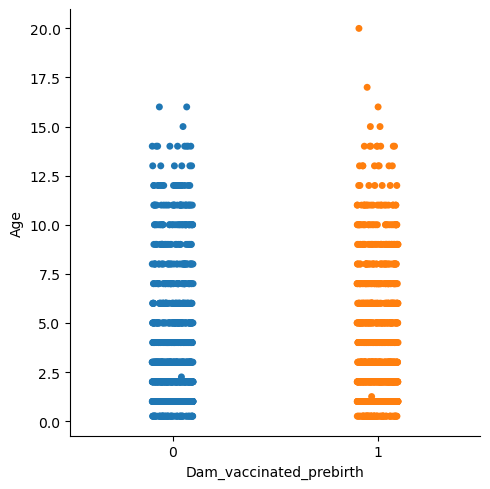

In [35]:
sns.catplot(data=Environment_Skin, x="Dam_vaccinated_prebirth", y="Age", order=["0", "1"])
plt.show()

In [36]:
#0=No, 1=Yes
Environment_Skin['Dam_dewormed_prebirth'].value_counts()

1    3903
0     158
Name: Dam_dewormed_prebirth, dtype: int64

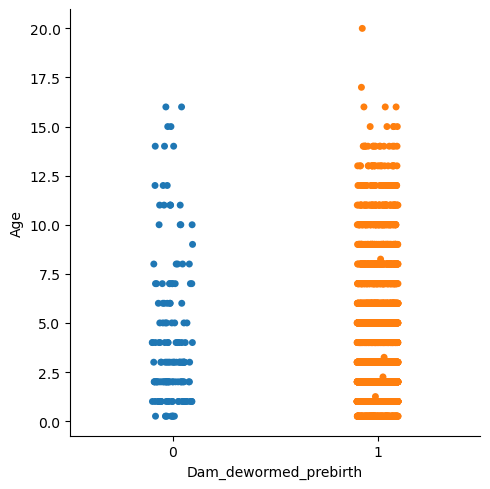

In [37]:
sns.catplot(data=Environment_Skin, x="Dam_dewormed_prebirth", y="Age", order=["0", "1"])
plt.show()

In [38]:
#1=No 2=Yes
Environment_Skin['Skin symptoms_dam'].value_counts()

1    2823
2     121
Name: Skin symptoms_dam, dtype: int64

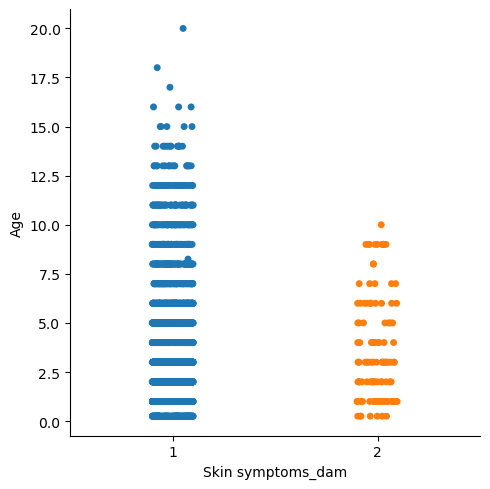

In [39]:
sns.catplot(data=Environment_Skin, x="Skin symptoms_dam", y="Age", order=["1", "2"])
plt.show()

In [40]:
#1=Mainly inside, 2=Rarely inside, 3=Only outside
Environment_Skin['Smoking_previously'].value_counts()

3    2760
2     192
1      93
Name: Smoking_previously, dtype: int64

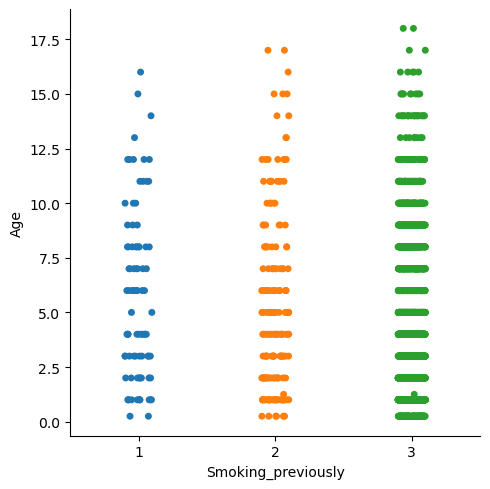

In [41]:
sns.catplot(data=Environment_Skin, x="Smoking_previously", y="Age", order=["1", "2", "3"])
plt.show()

### Translating Breeds from Finnish to English 

In [43]:
Breeds = Environment_Skin['Breed']

In [44]:
Breeds.to_csv('Breeds.csv')

In [45]:
Breeds.value_counts().head(30)

monirotuinen                      1131
saksanpaimenkoira                  520
labradorinnoutaja                  293
rottweiler                         195
kultainennoutaja                   184
suomenlapinkoira                   181
shetlanninlammaskoira              140
staffordshirenbullterrieri         139
bordercollie                       124
jackrussellinterrieri              121
hovawart                           114
cavalier kingcharlesinspanieli     107
novascotiannoutaja                 104
collie, pitkäkarv.                 103
lapinporokoira                      96
berninpaimenkoira                   95
kääpiösnautseri                     90
kääpiöpinseri                       90
bokseri                             85
dobermanni                          80
tanskandoggi                        79
australianpaimenkoira               79
cockerspanieli                      77
espanjanvesikoira                   75
parsonrussellinterrieri             74
samojedinkoira           

In [46]:
df = df.reset_index()

In [47]:
df['Breed'].value_counts()

Border Collie                    1
Cavalier King Charles Spaniel    1
Boston Terrier                   1
Irish Terrier                    1
Welsh Terrier                    1
                                ..
Australian Terrier               1
Newfoundland                     1
Field Spaniel                    1
Samoyed                          1
Afghan Hound                     1
Name: Breed, Length: 105, dtype: int64

In [48]:
English_Breeds = df['Breed']

In [49]:
English_Breeds.to_csv('English_Breeds.csv')

In [50]:
Breeds_translated = pd.read_csv("../Breeds/Breeds.csv", encoding='latin-1')

In [51]:
Breeds_translated 

,Breed,Breed En,Unnamed: 2,Unnamed: 3
0,airedalenterrieri,Airedale Terrier,NaN,NaN
1,alaskan husky,alaskan husky,NaN,NaN
2,amerikan akita,American Akita,NaN,NaN
3,amerikanbulldoggi,American Bulldog,NaN,NaN
4,anatolianpaimenkoira,Anatolian Shepherd Dog,NaN,NaN
...,...,...,...,...
256,saksanmetsÃ¤stysterrieri,NaN,NaN,NaN
257,kÃ¤Ã¤piÃ¶pystykorva,NaN,NaN,NaN
258,venÃ¤lÃ¤is-eurooppalainen laika,NaN,NaN,NaN
259,itÃ¤siperianlaika,NaN,NaN,NaN


In [52]:
Breeds_translated = Breeds_translated.drop(columns=['Unnamed: 2', 'Unnamed: 3'])
Breeds_translated.shape

(261, 2)

In [53]:
merged_df = pd.merge(Environment_Skin, Breeds_translated, on='Breed', how='outer')

In [54]:
merged_df

,Breed,Skin symptoms,Season born,Heating system_house,House _now,House_before,Clean_house,Puppy_dewormed,Puppy_vaccinated,Dam_dewormed_prebirth,...,Born in owner family,Smoking_previously,Does the dog have a yard,Bcs_under 2 mo,Outside_under 2 mo,Outside a day_under 5mo,Skin symptoms_dam,Age,Vet diagnosis,Breed En
0,bordercollie,1,1,1,NaN,NaN,2,1,1,NaN,...,1,NaN,2,NaN,5,NaN,1,7.0,0,Border Collie
1,bordercollie,1,2,2,2,3,2,1,1,1,...,2,NaN,2,1,1,3,1,2.0,0,Border Collie
2,bordercollie,1,2,1,3,1,2,1,1,1,...,1,NaN,2,3,1,3,1,13.0,0,Border Collie
3,bordercollie,1,1,2,4,NaN,2,1,1,1,...,1,3,2,1,1,2,1,1.0,0,Border Collie
4,bordercollie,1,4,1,3,1,2,1,1,1,...,1,NaN,2,1,1,NaN,NaN,10.0,0,Border Collie
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8678,saksanmetsÃ¤stysterrieri,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8679,kÃ¤Ã¤piÃ¶pystykorva,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8680,venÃ¤lÃ¤is-eurooppalainen laika,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8681,itÃ¤siperianlaika,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [55]:
merged_df.isnull().sum().sort_values(ascending=False)

Dam_vaccinated_prebirth     6282
Skin symptoms_dam           5739
Smoking_previously          5638
Dam_dewormed_prebirth       4622
Outside_under 2 mo          3433
Outside a day_under 5mo     2844
Bcs_under 2 mo              2837
House_before                2312
Vet diagnosis               1303
Breed En                    1139
Heating system_house         875
Puppy_dewormed               684
Does the dog have a yard     534
Over 50% white               495
Puppy_vaccinated             460
Season born                  311
Gender                       269
Age                          160
Breed                        135
Clean_house                   91
House _now                    91
Other dogs                    40
Born in owner family          40
Other animals                 40
Skin symptoms                 40
dtype: int64

In [56]:
df_m = pd.merge(merged_df, df, left_on='Breed En', right_on='Breed', how='outer')

In [57]:
df_m.columns

Index(['Breed_x', 'Skin symptoms', 'Season born', 'Heating system_house',
       'House _now', 'House_before', 'Clean_house', 'Puppy_dewormed',
       'Puppy_vaccinated', 'Dam_dewormed_prebirth', 'Dam_vaccinated_prebirth',
       'Gender', 'Over 50% white', 'Other animals', 'Other dogs',
       'Born in owner family', 'Smoking_previously',
       'Does the dog have a yard', 'Bcs_under 2 mo', 'Outside_under 2 mo',
       'Outside a day_under 5mo', 'Skin symptoms_dam', 'Age', 'Vet diagnosis',
       'Breed En', 'Breed_y', 'Classification', 'Obey', 'Reps_lower',
       'Reps_upper', 'Height_low_inches', 'Height_high_inches',
       'Weight_low_lbs', 'Weight_high_lbs', 'Category'],
      dtype='object')

In [58]:
df_m.shape

(8687, 35)

In [59]:
#Check how many rows do not have an English translation of the breed
df_m[df_m['Breed En'].isna()]

,Breed_x,Skin symptoms,Season born,Heating system_house,House _now,House_before,Clean_house,Puppy_dewormed,Puppy_vaccinated,Dam_dewormed_prebirth,...,Breed_y,Classification,Obey,Reps_lower,Reps_upper,Height_low_inches,Height_high_inches,Weight_low_lbs,Weight_high_lbs,Category
3176,"mäyräkoira, karkeakarv.",1,3,2,1,1,2,1,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3177,"mäyräkoira, karkeakarv.",1,4,NaN,3,1,2,1,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3178,"mäyräkoira, karkeakarv.",1,4,2,1,4,2,1,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3179,"mäyräkoira, karkeakarv.",1,2,1,3,3,2,1,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3180,"mäyräkoira, karkeakarv.",1,4,2,4,1,2,1,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4314,venÃ¤jÃ¤najokoira,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8683,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Doberman Pinscher,Brightest Dogs,95%,1.0,4.0,26,28,60,100,working
8684,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Vizsla,Excellent Working Dogs,85%,5.0,15.0,48,66,22,25,sporting
8685,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Kuvasz,Average Working/Obedience Intelligence,50%,26.0,40.0,28,30,70,120,working


In [60]:
#Drop all rows with missing breed in english 
df = df_m.dropna(subset=['Breed En'])

In [61]:
df['Breed En'].nunique()

211

In [62]:
#Verify all rows have a breed in english "Breed En" 
df[df['Breed En'].isna()]

,Breed_x,Skin symptoms,Season born,Heating system_house,House _now,House_before,Clean_house,Puppy_dewormed,Puppy_vaccinated,Dam_dewormed_prebirth,...,Breed_y,Classification,Obey,Reps_lower,Reps_upper,Height_low_inches,Height_high_inches,Weight_low_lbs,Weight_high_lbs,Category


In [63]:
df = df.drop(columns=['Breed_x', 'Breed_y'])

In [64]:
df.shape

(7544, 33)

In [65]:
#Final merged df missing value counts 
missing = pd.concat([df.isnull().sum(), 100 * df.isnull().mean()], axis= 1)
missing.columns=["count", "%" ]
missing.sort_values(by=['count', '%'], ascending=False)

,count,%
Dam_vaccinated_prebirth,5444,72.163309
Skin symptoms_dam,4978,65.986214
Smoking_previously,4839,64.143690
Obey,4209,55.792683
Classification,4058,53.791092
Reps_lower,4058,53.791092
Reps_upper,4058,53.791092
Height_low_inches,4058,53.791092
Height_high_inches,4058,53.791092
Weight_low_lbs,4058,53.791092


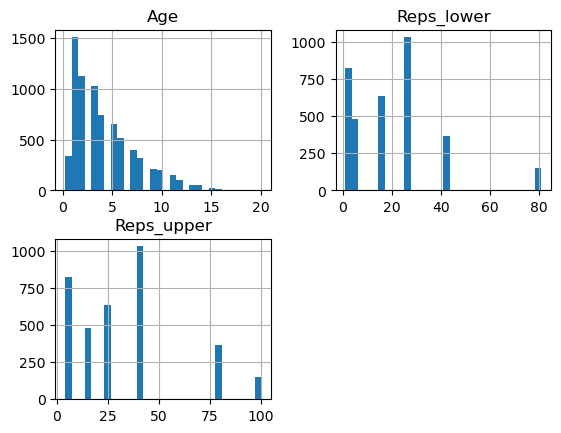

In [66]:
df.hist(bins=30)
plt.show()

In [67]:
#Drop all rows where all 4 top missing columns are NaN
df = df.dropna(subset = ['Dam_vaccinated_prebirth', 'Skin symptoms_dam', 'Smoking_previously','Dam_dewormed_prebirth'], how='all')
df.shape

(5265, 33)

In [68]:
mask = df['Dam_vaccinated_prebirth'].isna() 
ind = df['Dam_vaccinated_prebirth'].loc[mask].sample(frac=0.5).index
df.loc[ind, 'Dam_vaccinated_prebirth'] = 1
df['Dam_vaccinated_prebirth'] = df['Dam_vaccinated_prebirth'].fillna(0)
print(df['Dam_vaccinated_prebirth'].value_counts())

0    1583
1    1582
1    1091
0    1009
Name: Dam_vaccinated_prebirth, dtype: int64


In [69]:
#Last check on missing value counts
missing = pd.concat([df.isnull().sum(), 100 * df.isnull().mean()], axis= 1)
missing.columns=["count", "%" ]
missing.sort_values(by=['count', '%'], ascending=False)

,count,%
Obey,2890,54.890788
Classification,2787,52.934473
Reps_lower,2787,52.934473
Reps_upper,2787,52.934473
Height_low_inches,2787,52.934473
Height_high_inches,2787,52.934473
Weight_low_lbs,2787,52.934473
Weight_high_lbs,2787,52.934473
Category,2787,52.934473
Skin symptoms_dam,2699,51.263058


In [70]:
df.to_csv('../Data/df_cleaned.csv')

## Summary

-	Original CSVs provided the following: 
    - AKC Breed Info = 150 rows/5 columns containing basic information for each dog breed such as high AND low height in inches, and high AND low weigh in lbs. 
    - Dog intelligence = 136 rows/ 5 columns containing specific information for each breed intelligence and classification 
    - Best in show = *added to only obtain category for specific dog breeds already attained in the other two CSVs. 
-	Original xlsx file 
    - Data_Environmentandskinsymptoms = 8644 rows/ 26 columns containing medical records of 8644 dogs that include skin symptoms, breed, age, gender, vaccination, and other environmental aspects of living area (other animals, other dogs, born in owner family, etc.)
-	Due to Breeds in the Data_Environmentandskinsymptoms were in Finnish, we had to translate the breeds to English and merge that translated file. 
-	While checking on missing values:
    - We encountered only 9 for the first merge (Missing in the Obey column which represented 8.9% of total values). Decided to keep the column will fill null values with appropriate metric once EDA is performed. 
    - We encountered only 4 attributes in the Data_Environmentandskinsymptoms df that did not have null values. 4 have over 50% missing values with the highest missing 6242 entries for Dam_vaccinated_prebirth
-	Columns with over 50% missing values in original EnvironementSkin df. 
    - Dam_vaccinated_prebirth (72% missing values), 1241 records were a Yes, and 1160 were a No. *Given the almost 50-50 diff in values we will fill all NaN values in this column with 50-50 0 and 1. *
    - Skin symptoms_dam (66% missing values), 2823 records were a No, and 121 a yes. 
    - Smoking_previously (65% missing values), 2760 record only outside, 192 rarely inside, and 93 mainly inside. 
    - Dam_dewormed_prebirth (53% missing values), 3903 record Yes and 158 No. 
        - Making a new df with only these columns we have a df with 8643 rows/4columns. 
            - Dropping rows where all values are NaN we end up with a df of 6039 rows/4 columns which means a total of 2,604 rows have all of these column records as NaN. 
            - Dropping any rows where any record is NaN shows that only 569 records contain ALL information for these 4 columns.  
- Other observed relations from those columns with Age span were:
    - The dam being vaccinated showed a few instanceswhere the pup reached a higher life span. 
    - The dam being dewarmed showed a significant amount of instances where a higher life span was reached 
    - The dam having skin symtoms showed a shorter life span for pups at max of 10 years. 
    - Environmental smoking levels had the strongest visible differences where dogs showed a higher life span when there was no smoking in the house (3=Only outside)
        - *None of these are identified or show any correlation to skin condition or vet diagnosis. They are just observations.*
-	Dropped columns: 
    - Id and Fci dropped due to being unnecessary for this project. 
-	Dropped rows.
    - All rows with ALL null values on the 4 over 50% missing value columns were dropped leaving: 
        - New DF of 5265rows/33columns. 
        - Dropped missing % from 72 to 60% on “Dam_vaccinated_prebirth”
        - “Skin symptoms_dam” to 51% and “Smoking_previously” to 48%
-	Cleaned data was saved as ‘df_cleaned.csv’ and has a total of 5265 rows / 33 columns.
